In [1]:
#import string_processing_utils #you need to download the .py file in the shared fold
import pandas as pd
import networkx as nx
from tqdm import tqdm
import ast
from networkx.algorithms import bipartite
#from pyvis import network as net
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pickle
from networkx.algorithms import community
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
#modify to open the dataset of tweets
f = open('dict_of_edges.pkl', 'rb')
dict_of_freq= pickle.load(f)

In [3]:
hashtag_df=open('cleaned_data_set', 'rb')

In [4]:
hashtag_df=pickle.load(hashtag_df)

In [5]:
hashtag_df.head()

,user_name,tweet,compound,sentiment,hashtags,hashtags_str,cleaned_hashtags
1,CryptoND,😎 today 's thursday 🎬 take friend btc wallet s...,0.6808,1,"[thursday, btc, wallet, security]",thursday btc wallet security,"[thursday, wallet, security]"
3,Crypto is the future,btc big chance billion price \ bitcoin fx btc ...,0.2500,0,"[bitcoin, fx, btc, crypto]",bitcoin fx btc crypto,"[fx, crypto]"
5,ZerrBenz™ ⚔ ✪ 20732,💹 trade crypto binance 📌 enjoy cashback tradin...,0.4939,0,"[crypto, binance, cashback]",crypto binance cashback,"[crypto, binance, cashback]"
6,Bitcoin-Bot,lt'fire ' amp 'man'gt bitcoin crypto btc,0.0000,0,"[bitcoin, crypto, btc]",bitcoin crypto btc,[crypto]
8,Mikcoin,btc bitcoin ethereum eth crypto cryptotrading ...,0.0000,0,"[btc, bitcoin, ethereum, eth, crypto, cryptotr...",btc bitcoin ethereum eth crypto cryptotrading,"[ethereum, eth, crypto, cryptotrading]"


In [6]:
#use later
hashtag_freq = {}

#Record each and every example of hashtag that is used in a dictionary. Can be modified for users too. 

for index, row in tqdm(hashtag_df.iterrows()):
    for hashtag in row['cleaned_hashtags']:
        if hashtag not in hashtag_freq.keys():
            hashtag_freq[hashtag] = 1
    
        else:
            hashtag_freq[hashtag] += 1

330533it [00:17, 18583.14it/s]


In [7]:
#use later
#Sort all hashtags found in the tweets
sorted_highest_hashtags = {k: v for k, v in sorted(hashtag_freq.items(), key=lambda x: x[1],reverse=True)}
len(sorted_highest_hashtags.keys())

49755

In [8]:
sorted_highest_hashtags_list=list(sorted_highest_hashtags.keys())

In [9]:
sorted_highest_hashtags_list[:4]

['crypto', 'cryptocurency', 'ethereum', 'eth']

In [10]:
f = open('dict_of_edges.pkl', 'rb')
dict_of_freq= pickle.load(f)

In [11]:
data=np.array(list(dict_of_freq.values()))
np.quantile(data, 0.864)

65.0

In [13]:
#create a new graph
g_h=nx.Graph()
hashtag_node=set()
hashtag_edge=set()

weight=[]
for i, j in zip(list(dict_of_freq.keys()),dict_of_freq.values() ):

  a=i.split('&')
  if j >= 66:
    weight.append(j)
    g_h.add_edge(a[0], a[1], weight=j)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12499 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_

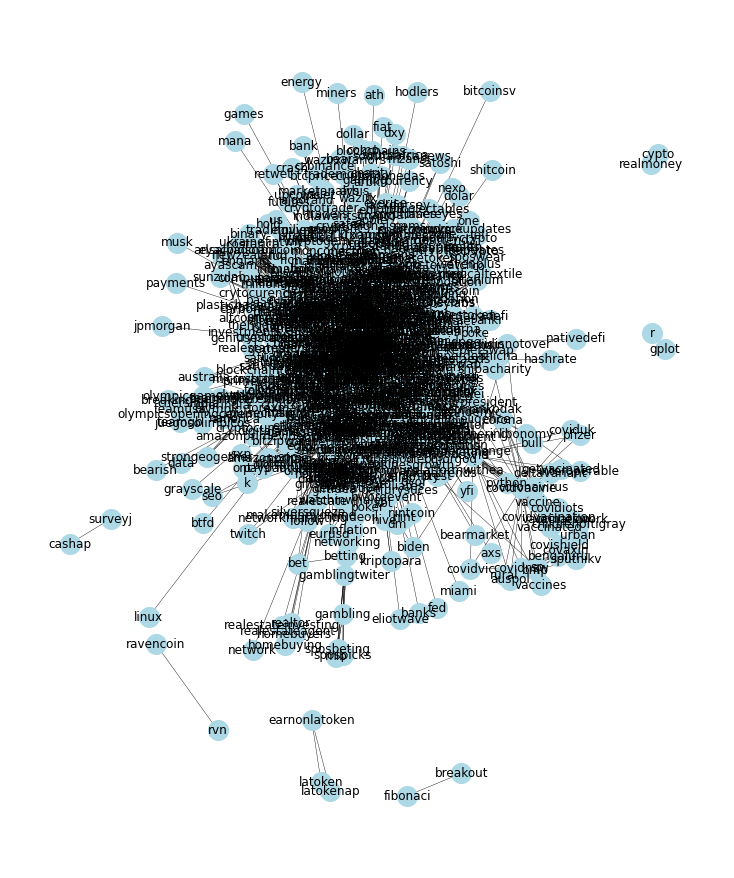

In [14]:
plt.figure(figsize=(10,12))
pos = nx.spring_layout(g_h, k=0.8)
nx.draw(g_h, pos , with_labels = True, width=0.4, node_color='lightblue', node_size=400)

In [15]:
def transform_into_series(dictio):
  if type(dictio) != list:
    return pd.Series(dictio, index=dictio.keys())
  else:
    for i in range(len(dictio)):
      dictio[i] = pd.Series(dictio[i], index = dictio[i].keys())
    return dictio

In [16]:
page_rank_list = nx.algorithms.link_analysis.pagerank_alg.pagerank(g_h, weight='weight')
#page_rank_list sorted by vaule
page_rank_list = {k: v for k, v in sorted(page_rank_list.items(), key=lambda x: x[1],reverse=True)}
hits_aut_list, hits_hub_list = nx.algorithms.link_analysis.hits_alg.hits(g_h)
#hits lists sorted by vaule
hits_aut_list = {k: v for k, v in sorted(hits_aut_list.items(), key=lambda x: x[1],reverse=True)}
hits_hub_list = {k: v for k, v in sorted(hits_hub_list.items(), key=lambda x: x[1],reverse=True)}
eig_centrality = nx.algorithms.centrality.eigenvector_centrality(g_h, max_iter=1000, weight='weight')
eig_centrality = {k: v for k, v in sorted(eig_centrality.items(), key=lambda x: x[1],reverse=True)}
centrality_measures= transform_into_series([page_rank_list, hits_aut_list, hits_hub_list, eig_centrality])
centrality_measures_df = pd.DataFrame({'PageRank' : centrality_measures[0], 'HITS_auth': centrality_measures[1], 'HITS_hub': centrality_measures[2], 'Eigenvalue centr.': centrality_measures[3]})


In [17]:
centrality_measures_df.sort_values(by = ['PageRank'], ascending=False)[:30]

,PageRank,HITS_auth,HITS_hub,Eigenvalue centr.
crypto,0.051984,0.054434,0.054434,0.416759
cryptocurency,0.040570,0.053739,0.053739,0.411434
ethereum,0.027336,0.040573,0.040573,0.310639
eth,0.023245,0.035201,0.035201,0.269509
blockchain,0.020552,0.028696,0.028696,0.219703
bnb,0.019687,0.033284,0.033284,0.254824
binance,0.018864,0.030536,0.030536,0.233788
dogecoin,0.016830,0.017532,0.017532,0.134273
bsc,0.015508,0.029934,0.029934,0.229174
airdrop,0.014578,0.026742,0.026742,0.204737


In [18]:
#degree distribution
deg=[]
for i in list(g_h.degree):
  deg.append(i[1])

In [19]:
#degree distribution
#plotting the degree distribution
sorted_d = sorted(deg)
occurrence = Counter(sorted_d)
x = list(Counter(occurrence).keys()) 
y = list(Counter(occurrence).values())
y = y/np.sum(y)
Pk = 1 - np.cumsum(y) # complementary cumulative distribution function (CCDF)

# set the last value of Pk (that is equal to 0 and generates problems when plotting in the log-scale) 
# equal to 1 and sort Pk in decreasing order to put the 1 at the beginning of the array
Pk[-1] = 1 
Pk = sorted(Pk, reverse = True)

In [20]:
#degree distribution
kmin = 10 # multiple values have been tried (with k = 50 the resulting fit is good)
deg=np.array(deg)
# Fit gamma only in the chosen interval
d2 = deg[deg>kmin]
ga = 1 + 1/np.mean(np.log(d2/kmin)) # ML estimate for gamma
print("Estimated \u03B3 =", -ga)
C = (ga-1)*kmin**(ga-1) # normalization condition

# The fit is performed for values of k > kmin. So, only part of the data are considered and therefore the total 
# probability is not 1 but is P_kmin
pos = np.argmax(np.array(x)>=kmin)
P_kmin = Pk[pos] # constant value that shifts the line where the data are placed

# degree distribution follows the power law
pk = C*P_kmin*x**-ga 



Estimated γ = -2.036552986641863


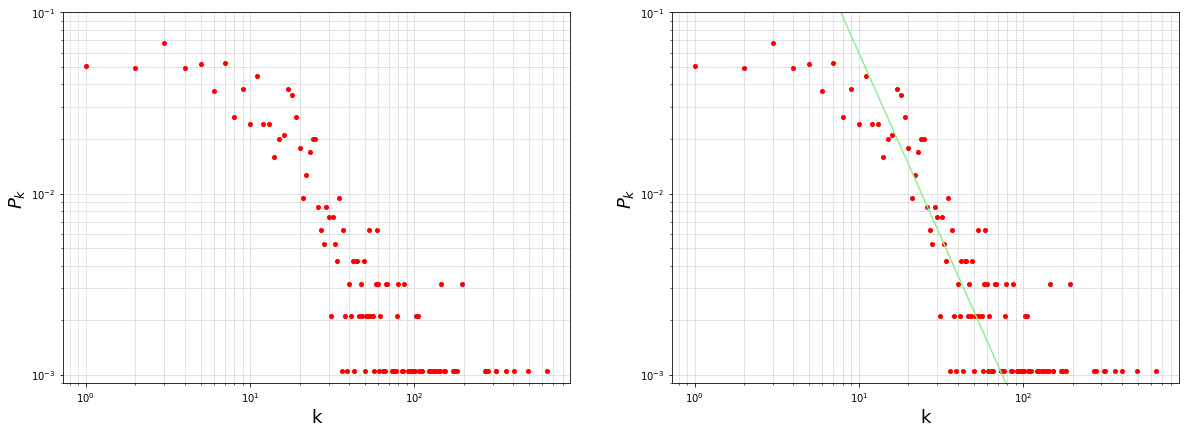

In [21]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.loglog(x, y, 'o', color='r', markersize = 4)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.ylim(top=0.1, bottom=0.0009)
plt.xlabel("k", size = 18)
plt.ylabel("$P_k$", size = 18)

plt.subplot(2, 2, 2)


plt.loglog(x, y, 'o', color='r', markersize = 4)
plt.loglog(x, pk, color='lightgreen')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.ylim(top=0.1, bottom=0.0009)
plt.xlabel("k", size = 18)
plt.ylabel("$P_k$", size = 18)
plt.savefig('degree distribution.png')

In [22]:
comm=[]
gammas=[0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75]
for i in gammas:
  comm.append(community.greedy_modularity_communities(g_h, weight = 'weight', resolution=i))

In [23]:
cov, perf = [], []
com_num=[]
mod_measure = []
for i in range(len(comm)):
  mod_measure.append(community.modularity(g_h, comm[i], weight = 'weight', resolution=gammas[i]))
  com_num.append(len(comm[i]))
  a,b = community.partition_quality(g_h, comm[i])
  cov.append(a)
  perf.append(b)

In [24]:
measures=pd.DataFrame({'modularity':mod_measure, 'coverage': cov, 'performance':perf, 'number of community': com_num, 'gamma':gammas})
measures

,modularity,coverage,performance,number of community,gamma
0,0.950117,0.998297,0.108575,8,0.05
1,0.900657,0.998297,0.108575,8,0.10
2,0.858627,0.970594,0.265464,11,0.15
3,0.822274,0.970504,0.267275,11,0.20
4,0.786537,0.969249,0.288936,11,0.25
5,0.621336,0.920836,0.459867,20,0.50
6,0.492045,0.829926,0.597735,26,0.75
7,0.402960,0.606599,0.800968,28,1.00
8,0.368054,0.576295,0.851579,23,1.25
9,0.345201,0.527255,0.892432,25,1.50


In [25]:
type(comm[5])

list

In [26]:
chosen_partion = comm[5]
s=1
for i in chosen_partion:
  print(len(i), s)
  print('##################')
  print(i)
  print('##################')
  s+=1

702 1
##################
frozenset({'fegarmy', 'nigeria', 'italy', 'financial', 'defiyieldprotocol', 'wazirxwariors', 'hamsteoken', 'forexmarket', 'cryptoexchange', 'coinmarketcap', 'pancakeswap', 'digitalcurency', 'dogecoin', 'cake', 'hodling', 'jpmorgan', 'finance', 'elonmusk', 'cardano', 'lksmi', 'technicalanalysis', 'tesla', 'america', 'dinowalet', 'altseason', 'tokensale', 'earn', 'fintwit', 'chiliz', 'cryptoaist', 'buy', 'staup', 'mana', 'sds', 'tether', 'silversqueze', 'holocoin', 'fil', 'ashangi', 'ath', 'corestaer', 'zil', 'btcturk', 'blockchains', 'cryptoming', 'etn', 'shibacoin', 'cryptoinvestor', 'xrpusd', 'gateio', 'investors', 'realestates', 'daps', 'bnb', 'kripto', 'cryptoales', 'safemonarmy', 'iota', 'ont', 'crypto', 'bullish', 'adon', 'dogeday', 'youtube', 'smalbusines', 'btsdivine', 'cryptocurencytrading', 'saturdaymorning', 'btfd', 'babydogecoin', 'ziliqa', 'dreamnetwork', 'elsalvador', 'upfi', 'paybswap', 'nftcolection', 'tubacoin', 'china', 'emilynews', 'data', 'me

In [27]:
c = open('compounds_bert_lexicon.pkl', 'rb')
bert_score= pickle.load(c)

In [28]:
bert_score['count']=pd.Series(np.zeros(49755))

In [29]:
bert_score.head()

,hash,prob_pos,norm_prob,count
0,,0.863626,0.727253,0.0
1,aarp,0.885088,0.770176,0.0
2,aave,0.840869,0.681738,0.0
3,ab,0.799497,0.598993,0.0
4,abakuas,0.889576,0.779152,0.0


In [30]:
dict_for_comm={}
d={}
for j in range(len(comm[10])):
  for i in tqdm(bert_score['hash']):
    if i in comm[10][j]:
      if j not in dict_for_comm.keys():
        dict_for_comm[j]=1
        d[j]= float(bert_score[bert_score['hash']==i]['norm_prob'])
      else:
        dict_for_comm[j]+=1
        d[j]+= float(bert_score[bert_score['hash']==i]['norm_prob'])

100%|██████████| 49755/49755 [00:00<00:00, 977363.33it/s]


In [31]:
average_score_per_community=[]
for i in d.keys():
  average_score_per_community.append(d[i]/dict_for_comm[i])


In [32]:
average_score_per_community

[0.639908519253802,
 0.6086821368903168,
 0.7537202066350206,
 0.7074671228333275,
 0.6293063801527023,
 0.8249360831578573,
 0.6337950326300956,
 0.6996016988047847,
 0.6775214465764853,
 0.453878128528595,
 0.6729829263687134,
 0.7582140972739772,
 0.6880234760396621,
 0.7439880222082138,
 0.6046564749308995,
 0.30146796703338624,
 0.7332698504130045,
 -0.2595295011997223,
 0.2840909957885742,
 0.6365310549736023,
 0.7280547022819519,
 0.7639876008033752,
 0.4807838797569275,
 0.3928690552711487,
 0.7589992880821228]

In [33]:
dict_for_comm

{0: 134,
 1: 121,
 2: 107,
 3: 101,
 4: 100,
 5: 75,
 6: 74,
 7: 54,
 8: 52,
 9: 30,
 10: 25,
 11: 19,
 12: 17,
 13: 8,
 14: 7,
 15: 5,
 16: 3,
 17: 2,
 18: 2,
 19: 2,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 2}

In [34]:
d

{0: 85.74774158000946,
 1: 73.65053856372833,
 2: 80.6480621099472,
 3: 71.45417940616608,
 4: 62.93063801527023,
 5: 61.870206236839294,
 6: 46.900832414627075,
 7: 37.778491735458374,
 8: 35.231115221977234,
 9: 13.61634385585785,
 10: 16.824573159217834,
 11: 14.406067848205566,
 12: 11.696399092674255,
 13: 5.9519041776657104,
 14: 4.232595324516296,
 15: 1.5073398351669312,
 16: 2.1998095512390137,
 17: -0.5190590023994446,
 18: 0.5681819915771484,
 19: 1.2730621099472046,
 20: 1.4561094045639038,
 21: 1.5279752016067505,
 22: 0.961567759513855,
 23: 0.7857381105422974,
 24: 1.5179985761642456}

In [35]:
dict_of_scores_by_hashtag={}
for i in tqdm(bert_score['hash']):
  if i in set(g_h.nodes()):
    #if i not in dict_of_scores_by_hashtag.keys():
    dict_of_scores_by_hashtag[i]=float(bert_score[bert_score['hash']==i]['norm_prob'])

100%|██████████| 49755/49755 [00:05<00:00, 9330.13it/s] 


In [36]:
for node in list(g_h.nodes):
  g_h.nodes[node]['pos']=dict_of_scores_by_hashtag[node]

In [37]:
nx.numeric_assortativity_coefficient(g_h, 'pos')

0.4856590195436791

In [38]:
nx.degree_pearson_correlation_coefficient(g_h)

-0.24251280306474743

In [39]:
adj=nx.linalg.graphmatrix.adjacency_matrix(g_h)

In [40]:
x=adj.dot(np.ones(np.max(adj.shape)))

In [41]:
n=np.max(adj.shape)

In [42]:
nonz = adj.nonzero()
# sum of in_degree of in-neighbors
sum_in_in = np.zeros(n)

In [43]:
num_nei_in = np.zeros(n)

In [44]:
import warnings
import math
import statistics as sts
from scipy import stats

In [45]:
for row, column in zip(nonz[0], nonz[1]):
    
    num_nei_in[row] += 1
    
    
    sum_in_in[row] += x[column]
    
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    avg_in_in = np.divide(sum_in_in, num_nei_in)

In [46]:
def find_mu(x,y):
    filter_x = ()
    filter_y = ()
    for a,b in zip(x,y):
        if (not math.isnan(b)) and a>0 and b>0:
            filter_x += (a,)
            filter_y += (b,)
    di = {}
    for x_ in filter_x:
        di[x_] = ()
    for x_, y_ in zip(filter_x, filter_y):
        di[x_] += (y_, )
    filter_x = ()
    filter_y = ()
    for key, value in di.items():
        filter_x += (key, )
        filter_y += (sts.mean(value),)
    num_log = list(map(lambda x : math.log(x, 10), filter_x))
    avg_log = list(map(lambda x : math.log(x, 10), filter_y))
    lin = stats.linregress(num_log, avg_log)
    inter_x = np.logspace(0, max(num_log),100)
    inter_y = inter_x**(lin.slope)*10**(lin.intercept)
    return lin.slope, filter_x, filter_y, inter_x, inter_y, lin.slope, lin.intercept


In [47]:
slope, filter_x, filter_y, inter_x, inter_y, mu, i = find_mu(x, avg_in_in)

Text(0, 0.5, 'k_nn')

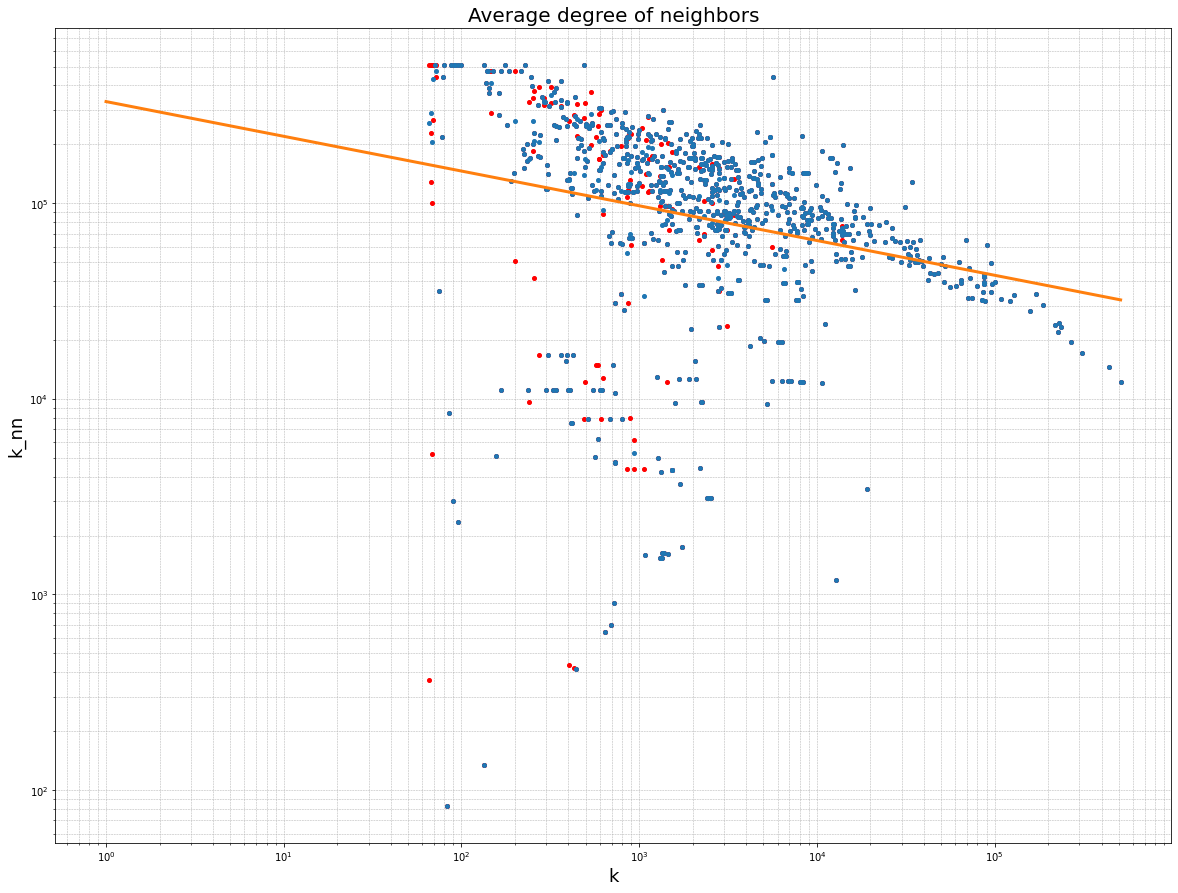

In [48]:
plt.figure(figsize=(20, 15))
plt.loglog(x, avg_in_in, 'o', color='r', markersize = 4)
plt.loglog(filter_x, filter_y, 'o', markersize = 4)
plt.plot(inter_x,inter_y,linewidth=3)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title("Average degree of neighbors", size = 20)
plt.xlabel("k", size = 18)
plt.ylabel("k_nn", size = 18)
#plt.savefig('Average degree of neighbors.png')

In [49]:
print(mu, int)

-0.17759320694694355 <class 'int'>
